In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets

# svm 간단한 예제_ 분류

In [2]:
x = [[0,0],[1,1]]
y = [0,1]

clf = svm.SVC()
clf.fit(x,y)

SVC()

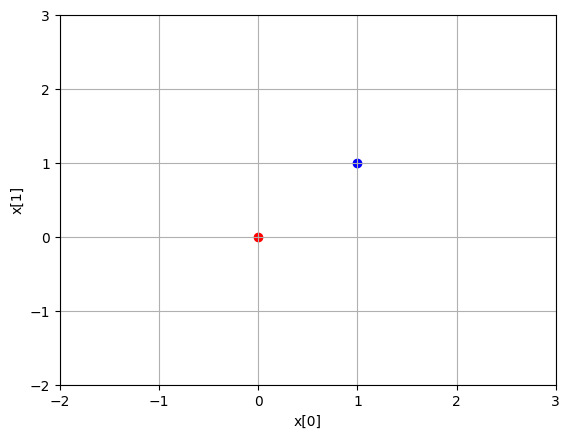

In [3]:
#데이터 시각화

plt.scatter([0],[0], c='red')
plt.scatter([1],[1], c='blue')


plt.xlim(-2,3)
plt.ylim(-2,3)
plt.xlabel('x[0]')
plt.ylabel('x[1]')

plt.grid()
plt.show()



In [4]:
#test data 예측 >> 첫번째 클래스로 예측

clf.predict([[-1, -1]])

array([0])

In [5]:
clf.predict([[2,2]])

array([1])

In [6]:
#support vector 확인

clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [7]:
#support vector의 data index
#데이터 중 몇번째 데이터가 support vector인지 확인
#여기서, 0번, 1번 데이터가 support vector
clf.support_

array([0, 1])

In [8]:
#class 별 support vector의 개수
#여기서는 각 클래스별 1개씩 존재
clf.n_support_

array([1, 1])

# SVM 분류 예제 iris data

In [9]:
#0, 1번 꽃의 꽃받침(sepal)의 길이(length), 너비(width)만 저장
iris = datasets.load_iris()

x_iris = iris.data[:100, :2]
y_iris = iris.target[:100]

In [10]:
x_iris, y_iris

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8, 3.4],
        [5. , 3. ],
        [5. , 3.4],
        [5.2, 3.5],
        [5.2, 3.4],
        [4.7, 3.2],
        [4.8, 3.1],
        [5.4, 3.4],
        [5.2, 4.1],
        [5.5, 4.2],
        [4.9, 3.1],
        [5. , 3.2],
        [5.5, 3.5],
        [4.9, 3.6],
        [4.4, 3. ],
        [5.1, 3.4],
        [5. , 3.5],
        [4.5, 2.3],
        [4.4, 3.2],
        [5. , 3.5],
        [5.1, 3.8],
        [4.8, 3. ],
        [5.1, 3.8],
        [4.6, 3.2],
        [5.3, 3.7],
        [5. , 3.3],


In [11]:
# SVM reqularization parameter
# 여기서 C는 SVM수식에 나오는 C와 반비례 관계
# >> C가 클수록 >> 더 작은 수의 support vector 허용
# 원래 수식 C : C가 클수록 더많은 수의 support vector 허용

In [12]:
C = 100

#훈련용 데이터 적합
clf = svm.SVC(kernel='linear', C=C).fit(x_iris, y_iris)

In [13]:
# SV
clf.support_vectors_

array([[5.5, 3.5],
       [4.5, 2.3],
       [4.9, 2.4],
       [5.4, 3. ]])

In [14]:
#support vectors의 data index
# 36, 41, 57, 84가 sv로 선정

clf.support_

array([36, 41, 57, 84])

In [15]:
clf.support_[0]

36

In [16]:
x_iris[clf.support_[0]] # 36번 index의 데이터

array([5.5, 3.5])

In [17]:
# 클래스 별 support vectors의 개수
# 0번 클래스(꽃)2개, 1번 클래스(꽃) 2개
clf.n_support_

array([2, 2])

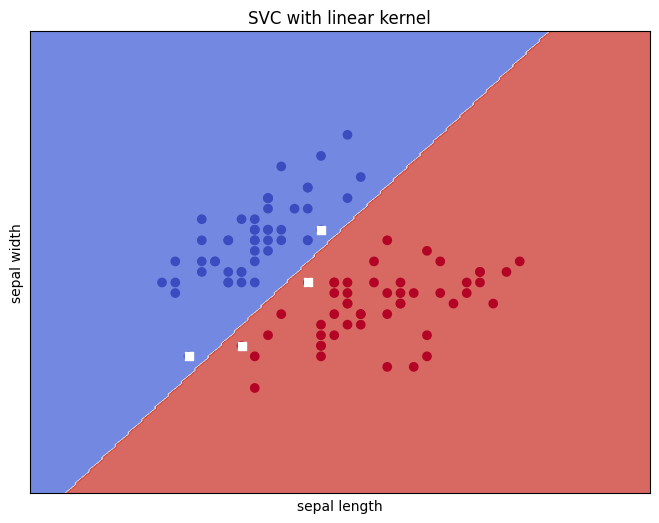

In [18]:
#svc 시각화

plt.figure(figsize=(8,6))

#분류 경계선, 배경 만들기
h = .02 #step size in the mesh

x_min, x_max = x_iris[:, 0].min() - 1, x_iris[:, 0].max() + 1
y_min, y_max = x_iris[:, 1].min() - 1, x_iris[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
            (np.arange(y_min, y_max, h)))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#ravel() 차원을 축소 함 (2차원 >> 1차원 ) / .c_는 열 단위로 연결 (1차원 >> 2차원)

#meshgrid 형태(xx.shape)로 z shape 변경
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)
#결정경계를 채워진 등고선 그림, cmap : color map

# 훈련용 데이터를 배경 위에 표시 (꽃받침 길이와 너비)
plt.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=plt.cm.coolwarm)

# support vector를 배경 위에 표시
for idx in clf.support_:
    plt.scatter(x_iris[idx][0], x_iris[idx][1], c='white', marker='s')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with linear kernel')
plt.show()


여기서 잠깐

In [19]:
xx = [[1,2,3], [4,5,6]]
xx

[[1, 2, 3], [4, 5, 6]]

In [20]:
# 리스트 >> 배열
xx = np.array(xx)
print(xx)
xx.ravel() # 2차원 >> 1차원

[[1 2 3]
 [4 5 6]]


array([1, 2, 3, 4, 5, 6])

In [21]:
xx = np.array([1,2,3])
yy = np.array([4,5,6])
print(xx)
print(yy)

np.c_[xx, yy]

[1 2 3]
[4 5 6]


array([[1, 4],
       [2, 5],
       [3, 6]])

#SVM kernel 비교 iris

In [22]:
C = 1.0

#SVC(linear)
svc = svm.SVC(kernel='linear', C=C).fit(x_iris, y_iris)

#SVM (radial kernel)
rbf_svc = svm.SVC(kernel='rbf', gamma=1.5, C=C).fit(x_iris, y_iris)

# SVM (polynomial kernel)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x_iris, y_iris)

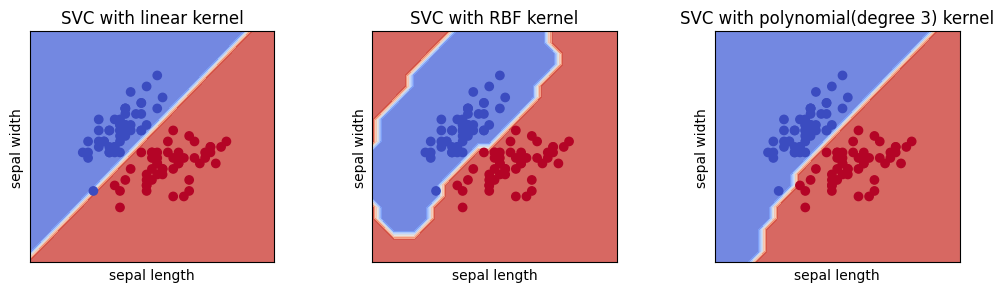

In [24]:
#SVC 시각화

plt.figure(figsize=(12,3))

h = 0.2 

x_min, x_max = x_iris[: ,0].min() - 1, x_iris[:,0].max() + 1
y_min, y_max = x_iris[: ,1].min() - 1, x_iris[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     (np.arange(y_min, y_max, h)))

titles = [  'SVC with linear kernel',
            'SVC with RBF kernel',
            'SVC with polynomial(degree 3) kernel']

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    #그림과 그림 사이 띄어 놓기 
    
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)
    #SVM 분류기의 결정 경계를 시각화하는 데 사용
    
    plt.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=plt.cm.coolwarm)
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()
